In [40]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [41]:
import pandas as pd
data = pd.read_csv('HateSpeechDatasetBalanced.csv')
data.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [42]:
import re
def preprocess_text(sen):
  text = re.compile(r'<[^>]+>').sub('', sen) # Remove HTML tags using a regular expression
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower() # Remove non-alphanumeric characters and convert to lowercase
  text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) # Remove single characters
  text = text.strip() # Remove leading and trailing whitespace
  text = re.sub(r'\s+', ' ', text) # Replace multiple spaces with a single space
  return text # Return the cleaned text

In [43]:
X = []
sentences = list(data['Content'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data["Label"], test_size=0.20, random_state=42)

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

tokenized_x_train = tokenizer.texts_to_sequences(X_train)
tokenized_x_test = tokenizer.texts_to_sequences(X_test)

In [47]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

tokenized_x_train = pad_sequences(tokenized_x_train, padding='post', maxlen=maxlen)
tokenized_x_test = pad_sequences(tokenized_x_test, padding='post', maxlen=maxlen)

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1

    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab

In [49]:
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab('glove.6B.50d.txt', tokenizer.word_index, embedding_dim)

In [50]:
scores = {}

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def test_model(model, X_train, y_train, X_test, y_test, history, model_name):
  train_results = model.evaluate(X_train, y_train, verbose=1)
  test_results = model.evaluate(X_test, y_test, verbose=1)

  scores.update({model_name + '_train': train_results,
                 model_name + '_test': test_results})

  pred_results = model.predict(X_test)
  pred_results = np.where(pred_results > 0.5, 1, 0)

  cm = confusion_matrix(y_test, pred_results)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=["Non-Hate", "Hate"],
              yticklabels=["Non-Hate", "Hate"])
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])

  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

  model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.7115 - loss: 0.5486 - val_acc: 0.7464 - val_loss: 0.5050
Epoch 2/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.7551 - loss: 0.4902 - val_acc: 0.7583 - val_loss: 0.4878
Epoch 3/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - acc: 0.7759 - loss: 0.4586 - val_acc: 0.7663 - val_loss: 0.4817
Epoch 4/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.7957 - loss: 0.4258 - val_acc: 0.7685 - val_loss: 0.4811
Epoch 5/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.8163 - loss: 0.3931 - val_acc: 0.7695 - val_loss: 0.4828
Epoch 6/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.8316 - loss: 0.3631 - val_acc: 0.7712 - val_loss: 0.4872
Epoch 7/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.8457 - loss: 0.3370 - val_acc: 0.7708 - val_loss: 0.5094
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - acc: 0.8612 - loss: 0.3124
4539/4539 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.7717 - loss: 0.5074
4539/4539

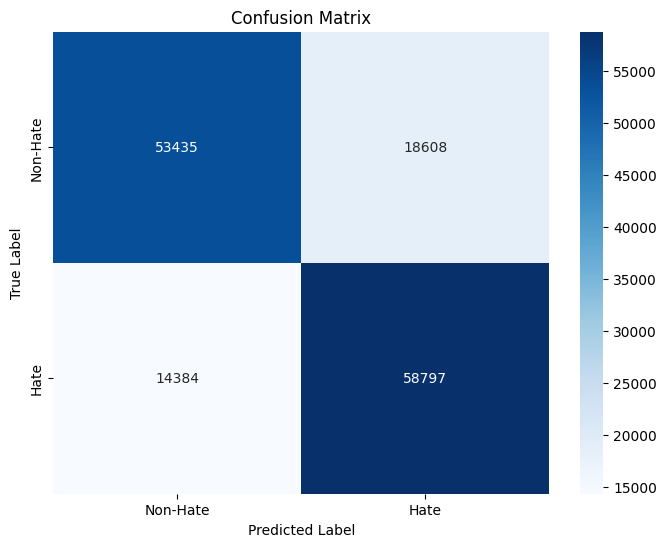

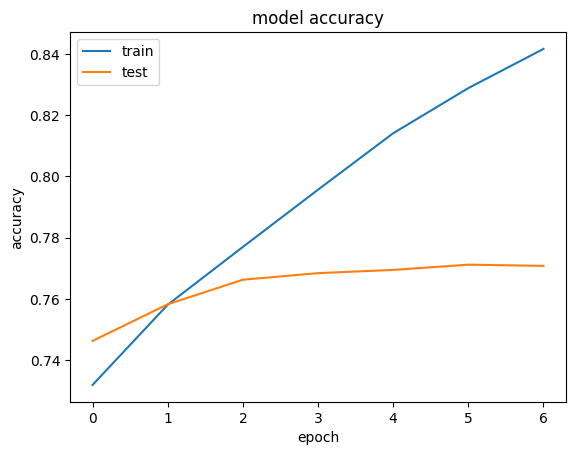

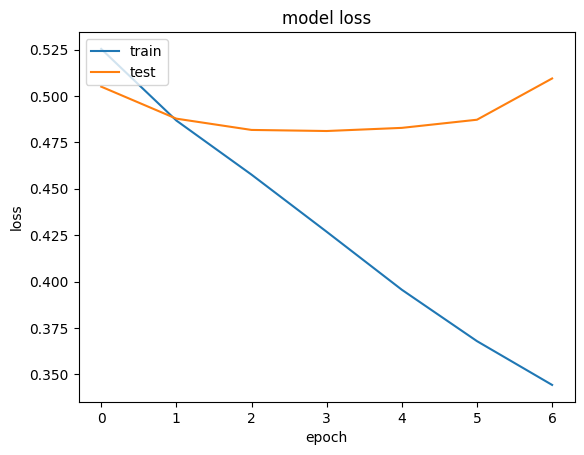

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 100, 50)             │       6,377,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 5000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,520,709 (32.50 MB)

 Trainable params: 714,369 (2.73 MB)

 Non-trainable params: 6,377,600 (24.33 MB)

 Optimizer params: 1,428,740 (5.45 MB)

In [52]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Embedding, Flatten

vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix_vocab], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(tokenized_x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2, callbacks=[early_stopping])

test_model(model, tokenized_x_train, y_train, tokenized_x_test, y_test, history, 'basic_ff')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.7651 - loss: 0.4795 - val_acc: 0.8013 - val_loss: 0.4222
Epoch 2/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - acc: 0.8146 - loss: 0.3976 - val_acc: 0.8113 - val_loss: 0.4045
Epoch 3/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.8277 - loss: 0.3734 - val_acc: 0.8206 - val_loss: 0.3905
Epoch 4/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.8389 - loss: 0.3509 - val_acc: 0.8228 - val_loss: 0.3903
Epoch 5/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - acc: 0.8473 - loss: 0.3339 - val_acc: 0.8201 - val_loss: 0.3916
Epoch 6/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - acc: 0.8550 - loss: 0.3189 - val_acc: 0.8165 - val_loss: 0.4168
Epoch 7/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.8615 - loss: 0.3057 - val_acc: 0.8202 - val_loss: 0.4059
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - acc: 0.8719 - loss: 0.2882
4539/4539 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.8203 - loss: 0.4024
4539/4

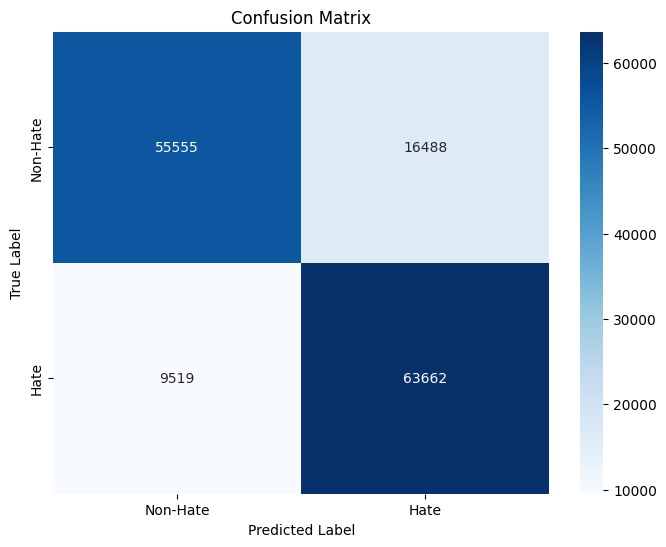

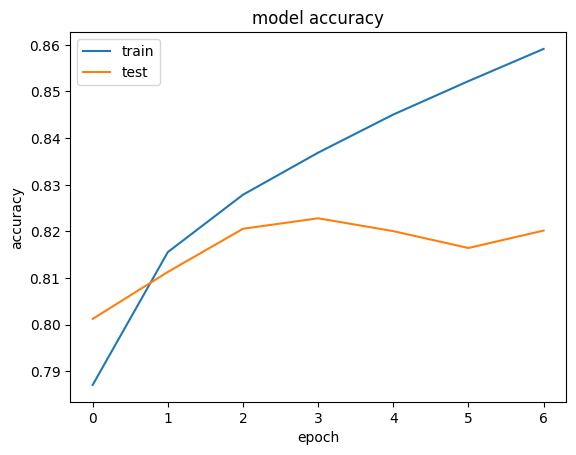

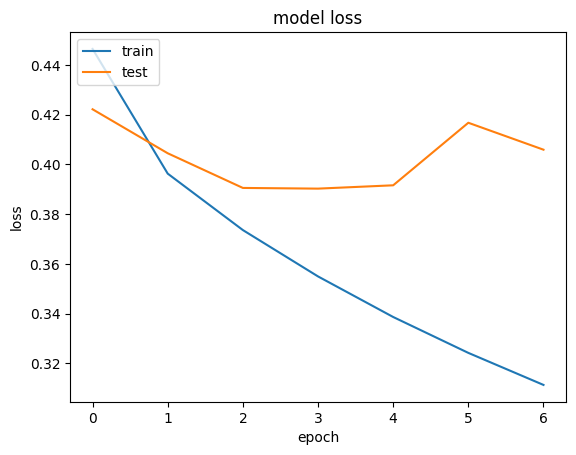

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 100, 50)             │       6,377,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 96, 128)             │          32,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 19, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 15, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_7               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,720,517 (25.64 MB)

 Trainable params: 114,305 (446.50 KB)

 Non-trainable params: 6,377,600 (24.33 MB)

 Optimizer params: 228,612 (893.02 KB)

In [53]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Embedding, Flatten

vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix_vocab], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(tokenized_x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2, callbacks=[early_stopping])

test_model(model, tokenized_x_train, y_train, tokenized_x_test, y_test, history, 'CNN')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.7390 - loss: 0.6894 - val_acc: 0.7707 - val_loss: 0.5186
Epoch 2/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - acc: 0.7703 - loss: 0.5173 - val_acc: 0.7743 - val_loss: 0.5112
Epoch 3/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.7760 - loss: 0.5058 - val_acc: 0.7688 - val_loss: 0.5067
Epoch 4/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - acc: 0.7799 - loss: 0.4990 - val_acc: 0.7746 - val_loss: 0.5200
Epoch 5/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - acc: 0.7829 - loss: 0.4948 - val_acc: 0.7845 - val_loss: 0.4921
Epoch 6/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.7826 - loss: 0.4940 - val_acc: 0.7831 - val_loss: 0.5020
Epoch 7/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - acc: 0.7839 - loss: 0.4918 - val_acc: 0.7830 - val_loss: 0.5023
Epoch 8/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.7839 - loss: 0.4906 - val_acc: 0.7816 - val_loss: 0.4885
Epoch 9/50
3631/3631 ━━━━━━━━━━━

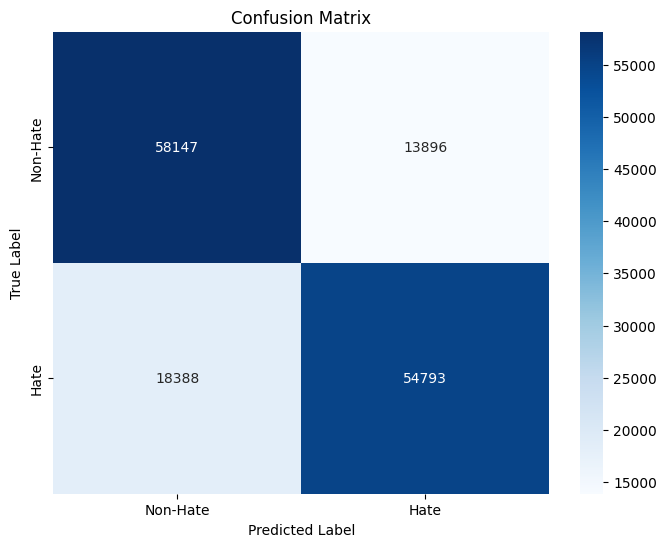

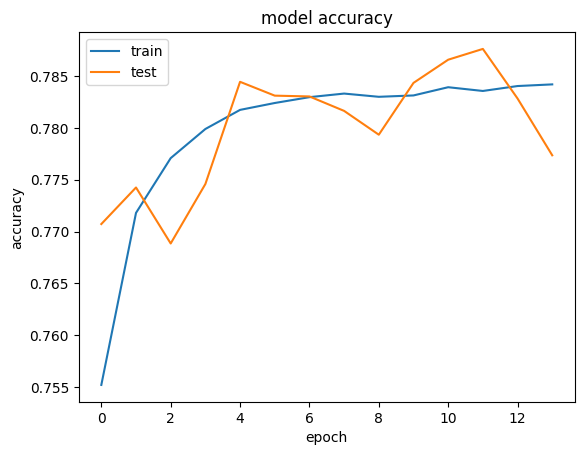

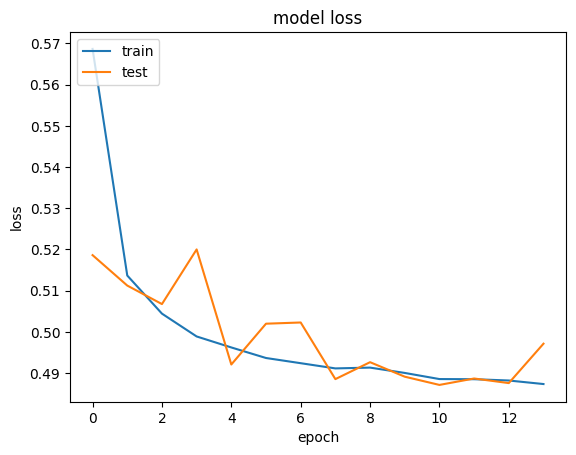

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 100, 50)             │       6,377,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 96, 128)             │          32,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 19, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_20 (Conv1D)                   │ (None, 15, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_8               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,720,517 (25.64 MB)

 Trainable params: 114,305 (446.50 KB)

 Non-trainable params: 6,377,600 (24.33 MB)

 Optimizer params: 228,612 (893.02 KB)

In [54]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Embedding, Flatten
from keras import regularizers


vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix_vocab], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(tokenized_x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2, callbacks=[early_stopping])

test_model(model, tokenized_x_train, y_train, tokenized_x_test, y_test, history, 'CNN_regularization')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - acc: 0.7360 - loss: 0.7013 - val_acc: 0.7720 - val_loss: 0.5193
Epoch 2/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - acc: 0.7669 - loss: 0.5270 - val_acc: 0.7771 - val_loss: 0.5060
Epoch 3/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - acc: 0.7727 - loss: 0.5134 - val_acc: 0.7770 - val_loss: 0.5028
Epoch 4/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - acc: 0.7749 - loss: 0.5083 - val_acc: 0.7620 - val_loss: 0.5160
Epoch 5/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.7763 - loss: 0.5055 - val_acc: 0.7726 - val_loss: 0.5053
Epoch 6/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - acc: 0.7772 - loss: 0.5049 - val_acc: 0.7831 - val_loss: 0.4967
Epoch 7/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - acc: 0.7774 - loss: 0.5039 - val_acc: 0.7719 - val_loss: 0.5245
Epoch 8/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.7780 - loss: 0.5035 - val_acc: 0.7824 - val_loss: 0.4921
Epoch 9/50
3631/3631 ━━━━━━━━━━━

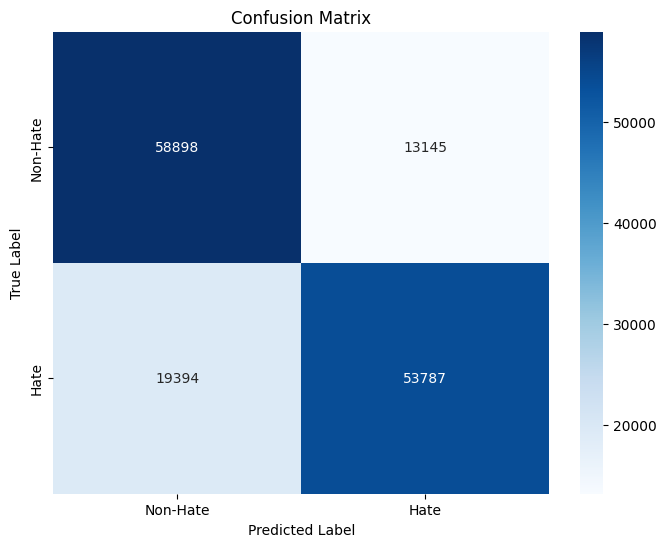

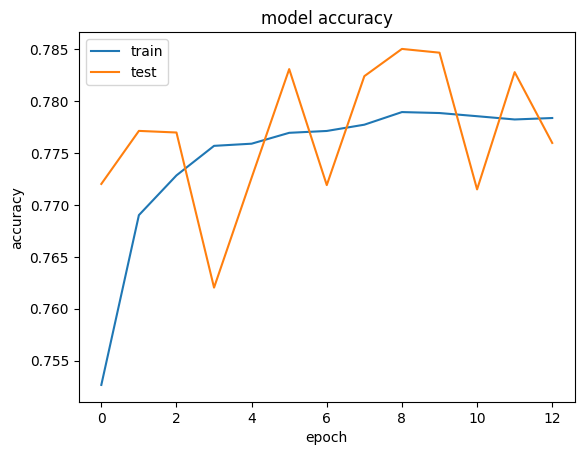

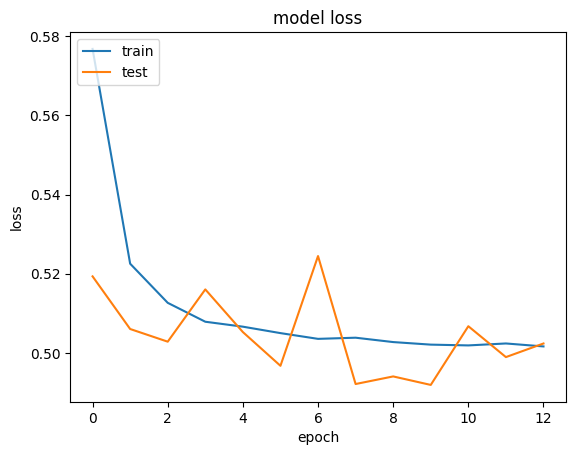

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 100, 50)             │       6,377,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_21 (Conv1D)                   │ (None, 96, 128)             │          32,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 19, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_22 (Conv1D)                   │ (None, 15, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_9               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,720,517 (25.64 MB)

 Trainable params: 114,305 (446.50 KB)

 Non-trainable params: 6,377,600 (24.33 MB)

 Optimizer params: 228,612 (893.02 KB)

In [55]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Embedding, Flatten
from keras import regularizers


vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix_vocab], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(tokenized_x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2, callbacks=[early_stopping])

test_model(model, tokenized_x_train, y_train, tokenized_x_test, y_test, history, 'CNN_dropout')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - acc: 0.6066 - loss: 3.2419 - val_acc: 0.7195 - val_loss: 1.7304
Epoch 2/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - acc: 0.7220 - loss: 1.5017 - val_acc: 0.7317 - val_loss: 1.0346
Epoch 3/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - acc: 0.7342 - loss: 0.9650 - val_acc: 0.7400 - val_loss: 0.8062
Epoch 4/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - acc: 0.7415 - loss: 0.7800 - val_acc: 0.7459 - val_loss: 0.7089
Epoch 5/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - acc: 0.7481 - loss: 0.6973 - val_acc: 0.7539 - val_loss: 0.6560
Epoch 6/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - acc: 0.7551 - loss: 0.6502 - val_acc: 0.7570 - val_loss: 0.6234
Epoch 7/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - acc: 0.7613 - loss: 0.6205 - val_acc: 0.7649 - val_loss: 0.6009
Epoch 8/50
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - acc: 0.7644 - loss: 0.6003 - val_acc: 0.7683 - val_loss: 0.5832
Epoch 9/50
3631/3631 ━━━━━━━━━━━

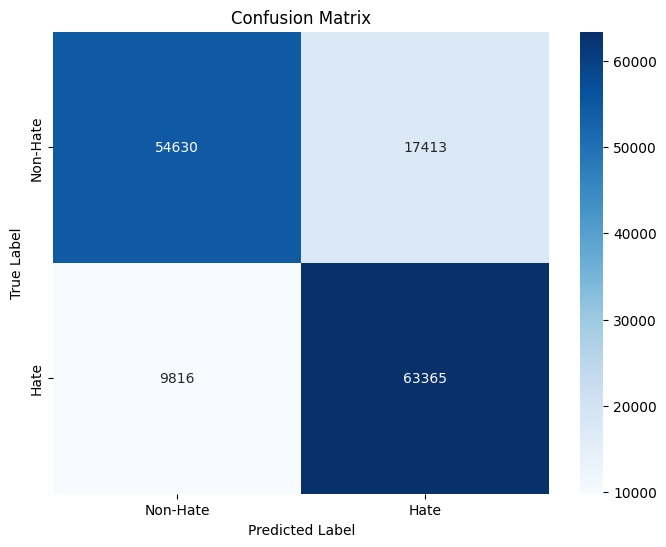

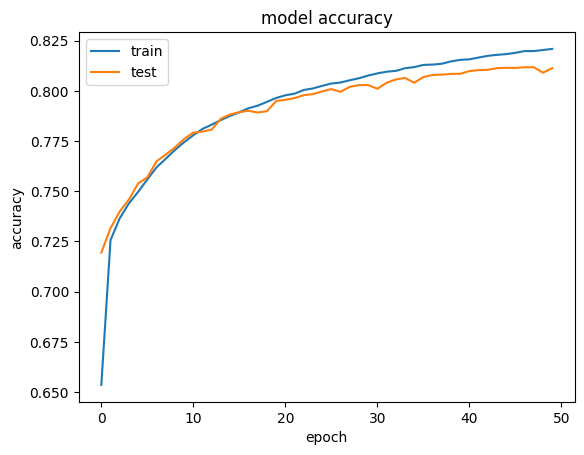

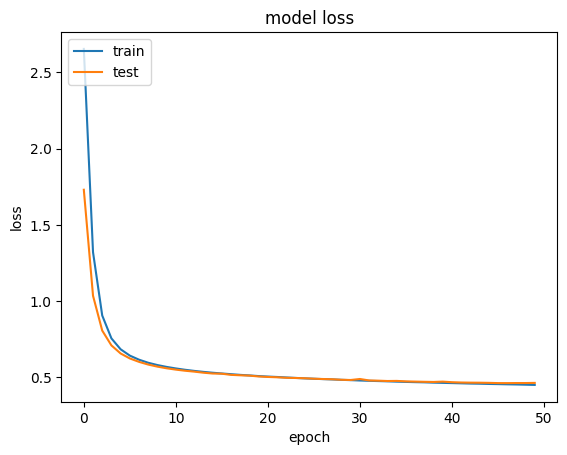

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ (None, 100, 50)             │       6,377,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_23 (Conv1D)                   │ (None, 98, 128)             │          19,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 32, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_24 (Conv1D)                   │ (None, 29, 128)             │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_25 (Conv1D)                   │ (None, 3, 128)              │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_10              │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,903,685 (26.34 MB)

 Trainable params: 175,361 (685.00 KB)

 Non-trainable params: 6,377,600 (24.33 MB)

 Optimizer params: 350,724 (1.34 MB)

In [56]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Embedding, Flatten
from keras import regularizers
from keras.optimizers import Adam


vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix_vocab], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling1D(4))
model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(GlobalMaxPooling1D())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
custome_optimizer = Adam(learning_rate=1.0e-5)
model.compile(optimizer=custome_optimizer, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(tokenized_x_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2, callbacks=[early_stopping])


test_model(model, tokenized_x_train, y_train, tokenized_x_test, y_test, history, 'CNN_cusom_optimizer')

In [57]:
scores

{'basic_ff_train': [0.3479982316493988, 0.8449375629425049],
 'basic_ff_test': [0.5077833533287048, 0.7728199362754822],
 'CNN_train': [0.30962294340133667, 0.8621299862861633],
 'CNN_test': [0.40123963356018066, 0.8209180235862732],
 'CNN_regularization_train': [0.49114394187927246, 0.7806092500686646],
 'CNN_regularization_test': [0.49503278732299805, 0.7776951193809509],
 'CNN_dropout_train': [0.49914830923080444, 0.7789617776870728],
 'CNN_dropout_test': [0.5019006133079529, 0.7759392261505127],
 'CNN_cusom_optimizer_train': [0.446601003408432, 0.8219196200370789],
 'CNN_cusom_optimizer_test': [0.46029791235923767, 0.812503457069397]}

In [60]:
pred_results = model.predict(tokenized_x_test)
pred_results = np.where(pred_results > 0.5, 1, 0)

cm = confusion_matrix(y_test, pred_results)

4539/4539 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


In [63]:
pred_results

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [67]:
X_test[0]

'you should be deeply embarrassed by not fully recognizing how goddamn ignorant you sound and probably you are'

In [79]:
y_test.iloc[0]

1

In [80]:
comparison = pd.DataFrame({'Content': X_test, 'Label': y_test, 'Prediction': pred_results.flatten()})

In [114]:
comparison

,Content,Label,Prediction
615013,you should be deeply embarrassed by not fully ...,1,1
75913,do not make me make you fall in love with bitc...,0,0
523130,trump america is anti immigrant sexual activit...,1,1
682117,you guys are clearly pole smoker please get ru...,1,1
395535,oh come along the only reason people like stri...,0,0
...,...,...,...
656362,pain satan wow what surprise the one homosexua...,1,1
558452,these are in lot from mixed race people in my ...,1,1
449268,it is the cameron that is even worse she has n...,1,1
39701,laughing out loud hey never said what slut goo...,0,0


In [88]:
false_positive = comparison[(comparison['Label'] == 0) & (comparison['Prediction'] == 1)]
false_negative = comparison[(comparison['Label'] == 1) & (comparison['Prediction'] == 0)]

In [112]:
false_negative['Content'].iloc[0]

'once he got niggas hi'